<a href="https://colab.research.google.com/github/vadim-vic/Signal-separation/blob/main/93_Example_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

18.303005217723125 -5


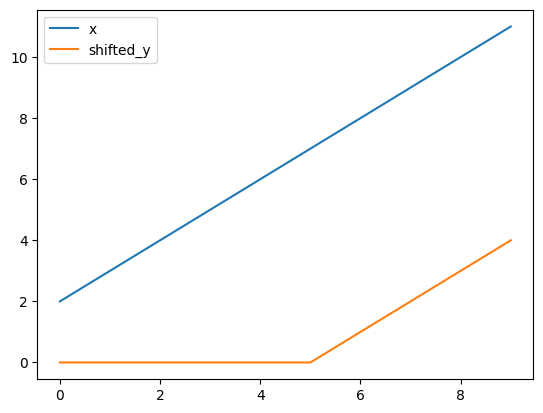

16.431676725154983 -4


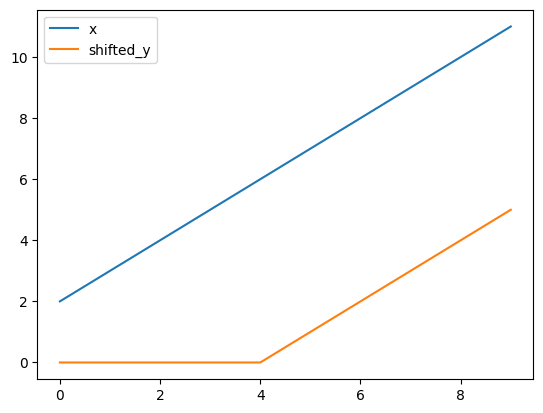

14.2828568570857 -3


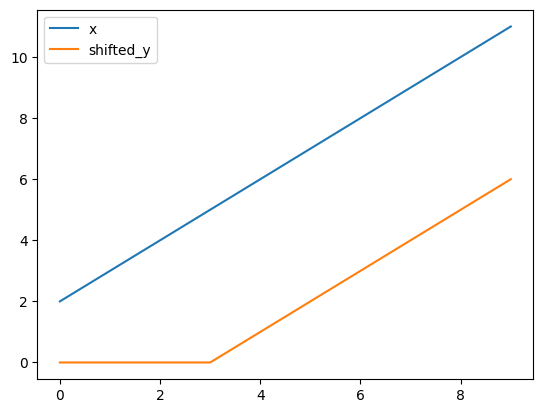

11.874342087037917 -2


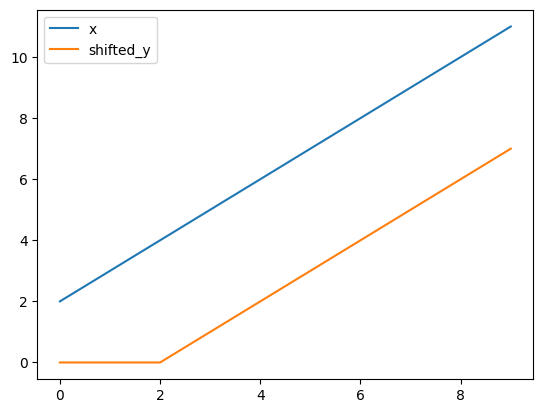

9.219544457292887 -1


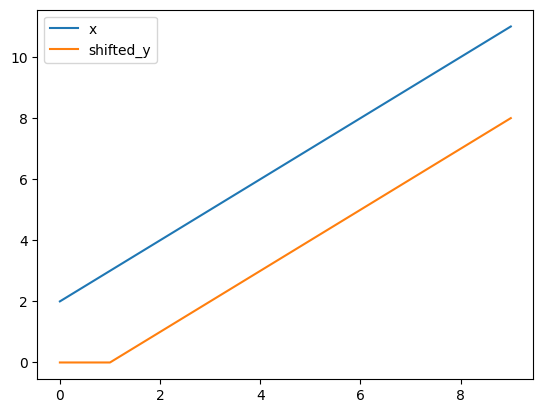

6.324555320336759 0


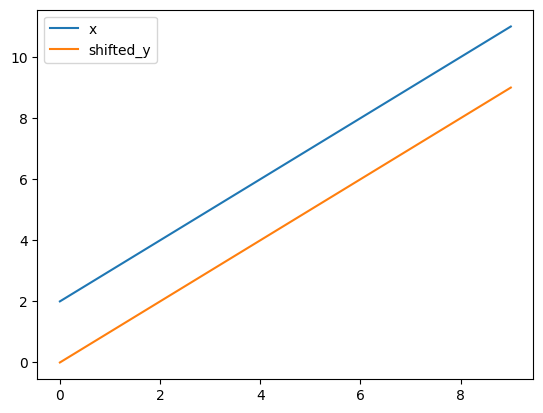

11.40175425099138 1


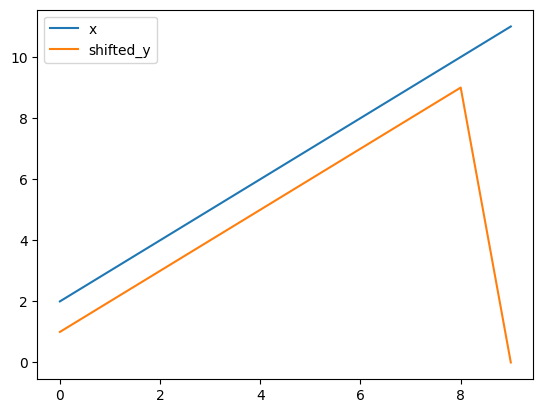

14.866068747318506 2


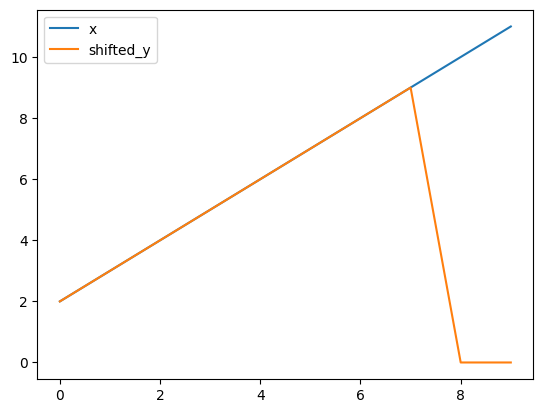

17.578395831246947 3


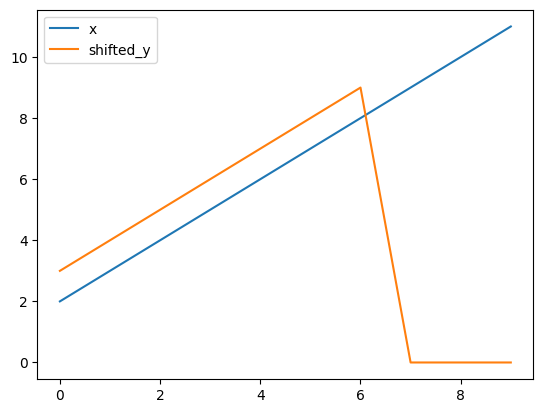

19.748417658131498 4


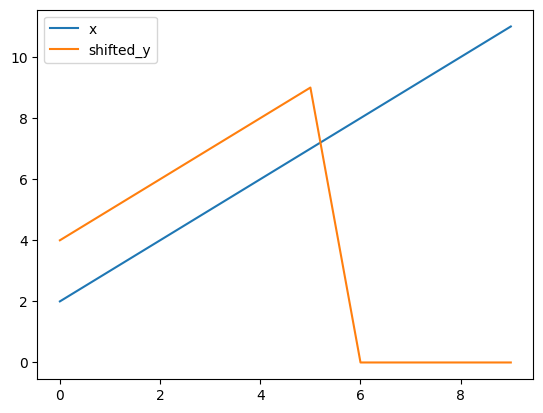

21.447610589527216 5


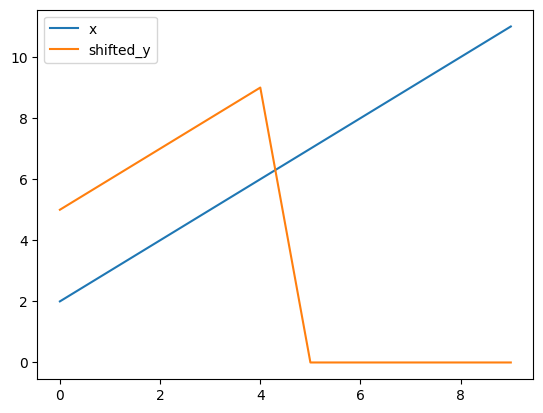

Best shift: 0, Minimum sum of squared differences: 6.324555320336759


In [3]:
def find_best_shift(x, y, N, demo=True):
  # Find the best phase of y to minimize the distance to x
  # N is the maximum allowed phase shift in either direction
  # Works for complex-valued vectors
  min_residue = float('inf')
  best_shift = 0

  # The shifting runs two times, put it to a function
  def shift_it(x, y, len_x, shift):
    if shift < 0:
      shifted_y = np.pad(y[:len_x + shift], (abs(shift), 0), 'constant', constant_values=0)
    else:
      shifted_y = np.pad(y[shift:], (0, shift), 'constant', constant_values=0)
    return shifted_y

  len_x = len(x)
  for shift in range(-N, N + 1):
    shifted_y = shift_it(x, y, len_x, shift)
    residue = np.linalg.norm(x - shifted_y)
    # residue = np.sum((x - shifted_y) ** 2)

    if demo:
      print(residue, shift)
      plt.plot(x, label='x')
      plt.plot(shifted_y, label='shifted_y')
      plt.legend()
      plt.show()

    if residue < min_residue:
      min_residue = residue
      best_shift = shift

  shifted_y = shift_it(x, y, len_x, best_shift)
  ###if is_proj:
    ###shifted_y = proj_xy(x, shifted_y)
  return shifted_y, best_shift, min_residue

# Example usage:
x = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
N = 5

shifted_y, best_shift, min_residue = find_best_shift(x, y, N)
print(f"Best shift: {best_shift}, Minimum sum of squared differences: {min_residue}")